In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

print(f'OpenCV: {cv2.__version__}')

OpenCV: 4.4.0


In [2]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(15,10));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img[:,:,::-1]);

In [3]:
sudoku = cv2.imread('img/sudoku.png')
sudoku_1 = cv2.imread('img/sudoku_1.png',0)
sudoku_ph = cv2.imread('img/sudoku-photo-2.jpg')
sudoku_ph_1 = cv2.imread('img/sudoku_1.jpg',0)
chess = cv2.imread('img/chess.jpg')
waldo = cv2.imread('img/waldo.jpg')
scene = cv2.imread('img/WaldoScene1.jpg')

green = (0,255,0)

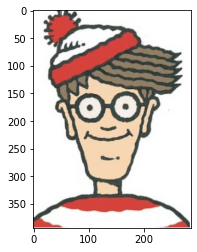

In [4]:
imshow(waldo, False)

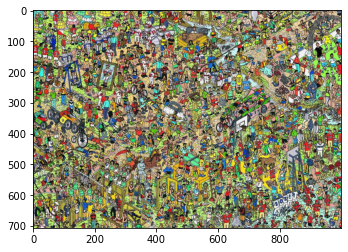

In [5]:
imshow(scene, False)

In [6]:
scene_copy = scene.copy()
waldo_copy = waldo.copy()

gray_scene = cv2.cvtColor(scene_copy, cv2.COLOR_BGR2GRAY)
gray_waldo = cv2.cvtColor(waldo_copy, cv2.COLOR_BGR2GRAY)

match = cv2.matchTemplate(gray_scene, gray_waldo, cv2.TM_CCOEFF)

In [7]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
top_left = max_loc

bottom_right = (top_left[0] + 50, top_left[1] + 50)

In [8]:
print(top_left, bottom_right)

(267, 141) (317, 191)


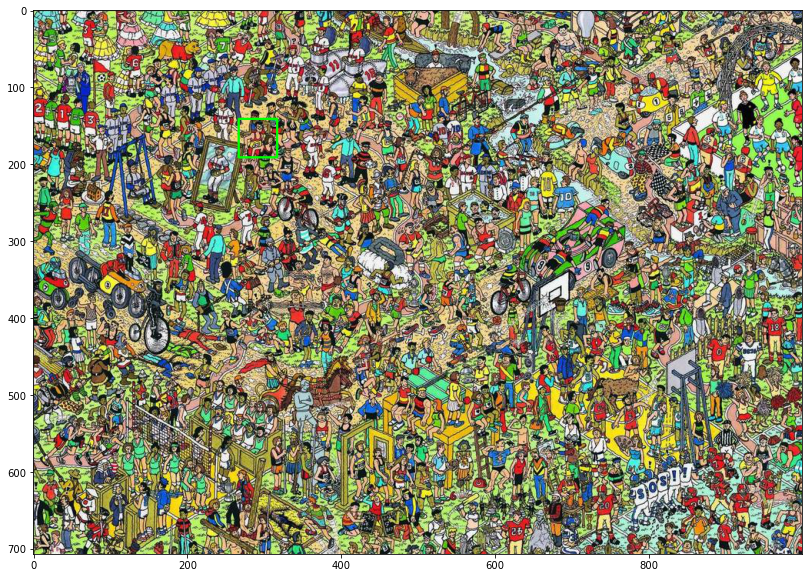

In [9]:
cv2.rectangle(scene_copy, top_left, bottom_right, green, 2)
imshow(scene_copy)

# Face Detection


In [10]:
people = cv2.imread('img/people1.jpg')
people_gray = cv2.imread('img/people1.jpg',0)
people2 = cv2.imread('img/people2.jpg')
people2_gray = cv2.imread('img/people2.jpg',0)

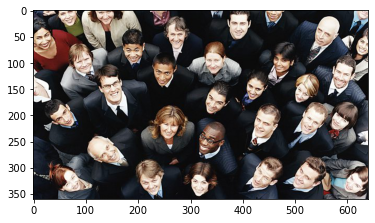

In [11]:
imshow(people, False)

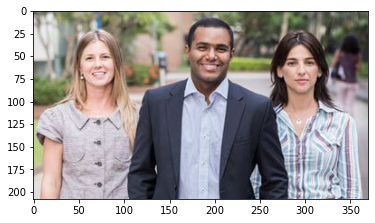

In [12]:
imshow(people2, False)

In [13]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
faces = face_classifier.detectMultiScale(people2_gray)

In [14]:
faces

array([[  5,   6,  30,  30],
       [168,  19,  58,  58],
       [270,  39,  51,  51],
       [ 46,  34,  50,  50]], dtype=int32)

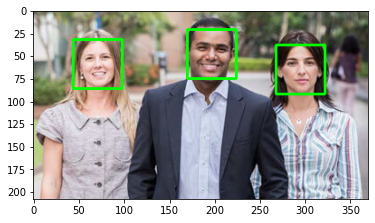

In [15]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
faces = face_classifier.detectMultiScale(people2_gray, scaleFactor=1.5, minNeighbors=3)

people2_copy = people2.copy()

for (x,y,w,h) in faces:
    # face = people_gray[y:y+h,x:x+w]

    cv2.rectangle(people2_copy, (x,y), (x+w,y+h), green,2)

imshow(people2_copy, False)

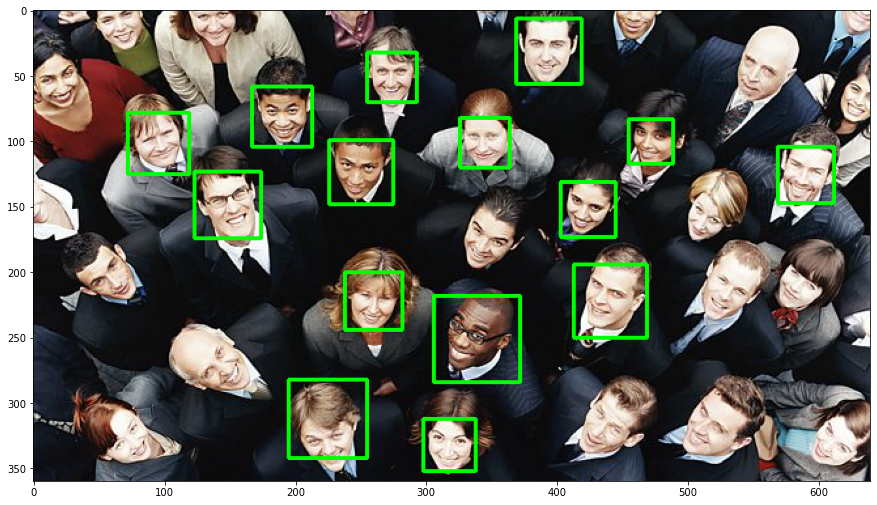

In [16]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
faces = face_classifier.detectMultiScale(people_gray, scaleFactor=1.1, minNeighbors=3)

people_copy = people.copy()

for (x,y,w,h) in faces:
    # face = people_gray[y:y+h,x:x+w]

    cv2.rectangle(people_copy, (x,y), (x+w,y+h), green, 2)

imshow(people_copy)

# Eye Detection

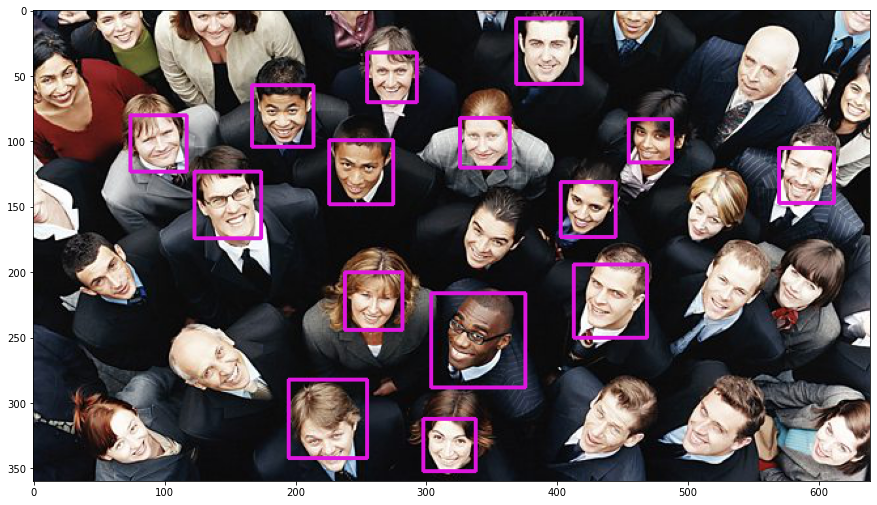

In [17]:
# creating copy of the image
people_copy_eye = people.copy()

# cascade classifier
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
faces = face_classifier.detectMultiScale(people_copy_eye, scaleFactor=1.1, minNeighbors=3)

eyes_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
eyes = eyes_classifier.detectMultiScale(people_copy_eye, scaleFactor=1.1, minNeighbors=3)



for (x,y,w,h) in faces:
    face = people_gray[y:y+h,x:x+w]
    cv2.rectangle(people_copy_eye,(x,y),(x+w,y+h),(222,22,222),2)
    if len(eyes) >= 1:
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(people_copy_eye, (ex, ey), (ex + ew, ey + eh), (240,255,10), -1)

imshow(people_copy_eye)

### check code form the day before for eye detection


# Find Corners

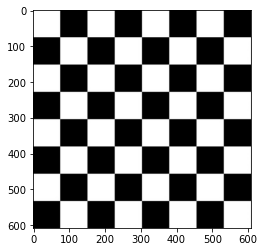

In [18]:
imshow(chess, False)

In [19]:
chess_copy = chess.copy()

gray_chess = cv2.cvtColor(chess_copy,cv2.COLOR_BGR2GRAY)


corners = cv2.goodFeaturesToTrack(gray_chess,80,0.6,1)

print(corners[1][0])

[380.  75.]


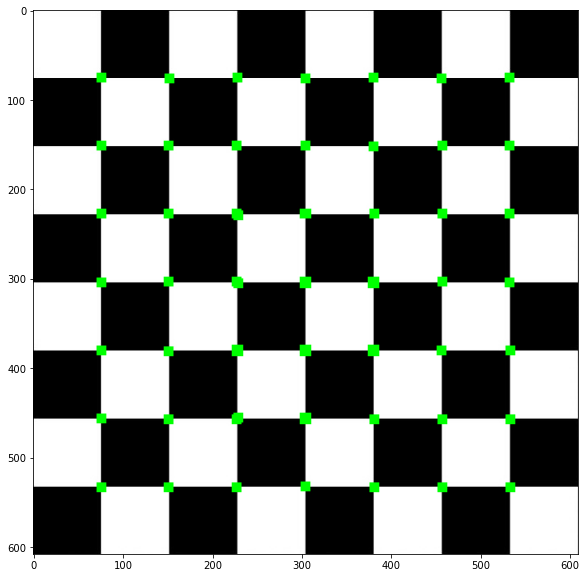

In [20]:
for corner in corners:
    x,y = corner[0]
    x = int(x)
    y = int(y)

    cv2.rectangle(chess_copy, (x-5,y-5), (x+5,y+5), green, -1)

imshow(chess_copy)

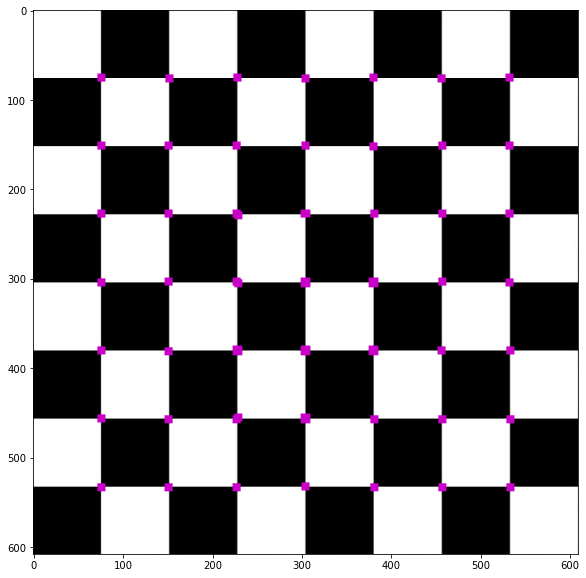

In [21]:
chess_copy_1 = chess.copy()
gray_chess_1 = cv2.cvtColor(chess_copy_1,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray_chess_1,75,0.2,1)



for corner in corners:
    x,y = corner[0]
    x = int(x)
    y = int(y)

    cv2.rectangle(chess_copy_1, (x-4,y-4), (x+4,y+4), (200,0,200), -1)

imshow(chess_copy_1)

# Background Substracting

In [22]:
# bg_substractor = cv2.createBackgroundSubtractorMOG2(history=5, varThreshold=5, detectShadows=True)

In [23]:
# background_substractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=200, detectShadows=True)
background_substractor = cv2.createBackgroundSubtractorKNN(history=100, dist2Threshold=300, detectShadows=True)
capture = cv2.VideoCapture(0)

if not capture.isOpened():
    exit(0)

while True:
    ret, frame = capture.read()
    if frame is None:
        break

    foreground_mask  = background_substractor.apply(frame)

    cv2.imshow('Frame', frame)
    cv2.imshow('Frame', foreground_mask)

    k = cv2.waitKey(30)
    if k == ord('q') or k == ord('Q'):
        break

    # k = cv2.waitKey(30) & 0xff


cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# Object Tracking

In [24]:
trackers = ['MIL', 'GOTURN']

In [25]:
mil_tracker = cv2.TrackerMIL_create()

In [26]:
video = cv2.VideoCapture(0)
cv2.imshow('Frame', frame)

### not finished

In [27]:
bounding_box = (129,47,74,85)

In [ ]:
ret = mil_tracker.init(frame, bounding_box)
p1 = ((bounding_box[0], bounding_box[1])
p2 = ((bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3])
cv2.rectangle(frame, p1,p2,(0,255,0),1)

imshow(frame)

In [ ]:
count = 0

while True:
    ret, frame = video.read()
    if not ret:
        break

    ok ,bounding_box = mil_tracker.update(frame)

    if ok:
        p1 = ((bounding_box[0], bounding_box[1])
        p2 = ((bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3])
        cv2.rectangle(frame, p1,p2,(0,255,0),1)

    plt.imshow(frame[:,:,::-1])
    plt.show()
    
    count += 1

    if count == 100:
        break